---

# <center> ★ Machine Learning Project -  Khurram ML  ★

#### <center> ***Domain: Cyber Security***

---

### Description:

To predict the intrution attack based on certain factors like                 etc. The dataset is big yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?


### Acknowledgement: 
put your research paper here


### Objective:
- Understand the Dataset & cleanup (if required).
- Build Classification models to predict the attack w.r.t multiple feature.
- Also evaluate the models & compare thier respective metrics like accuracy,recall,presicion and F1 score etc.

------

# <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Preparation
2. Data Pre-processing
3. Feature Selection
6. Machine Learning Modelling
7. Project Outcomes & Conclusion

---

# <center> Library Import

---

In [1]:
#Importing the basic librarires

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

----

# <center> 1. Data Preparation

---

In [2]:
# Concatinate all csv datafiles into one file

current_path = "./data/"
attack_data = pd.read_csv(current_path + "Attack.csv")
env_monitoring_data = pd.read_csv(current_path + "environmentMonitoring.csv")
patient_monitoring_data = pd.read_csv(current_path + "patientMonitoring.csv")

In [3]:
dfs = [attack_data.reset_index(drop=True), env_monitoring_data.reset_index(drop=True), patient_monitoring_data.reset_index(drop=True)]
data = pd.concat( [attack_data.reset_index(drop=True), env_monitoring_data.reset_index(drop=True), patient_monitoring_data.reset_index(drop=True)])

In [4]:
le = preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name].astype(str))
    else:
        pass
    

In [5]:
data.to_csv(current_path+"/final_df.csv",index=False)

# <center> 2. Data Exploration

In [6]:
df = pd.read_csv(current_path+"/final_df.csv")

pd.set_option('display.max_columns', None)
display(df.head())

target = 'label'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,tcp.connection.sack,tcp.connection.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.urg,tcp.hdr_len,tcp.payload,tcp.pdu.size,tcp.window_size_value,tcp.checksum,mqtt.clientid,mqtt.clientid_len,mqtt.conack.flags,mqtt.conack.val,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,mqtt.conflag.willflag,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,74,0,1,56808,1883,0,0.000000,0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,40,0,0.0,29200,27801,2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,62,0.0,0.0,0.0,50,0.0,0.0,0.0,6,64,0,1
1,0.000052,0.000052,74,1,0,1883,56808,4,0.000052,0,1,0.0,0.0,1.0,0.0,1,0,0,0,1,0,40,0,0.0,28960,27588,2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,62,0.0,0.0,0.0,50,0.0,0.0,0.0,6,64,0,1
2,0.000008,0.000060,74,0,1,56810,1883,0,0.000000,0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,40,0,0.0,29200,33722,2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,62,0.0,0.0,0.0,50,0.0,0.0,0.0,6,64,0,1
3,0.000012,0.000072,74,1,0,1883,56810,4,0.000012,0,1,0.0,0.0,1.0,0.0,1,0,0,0,1,0,40,0,0.0,28960,2626,2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,62,0.0,0.0,0.0,50,0.0,0.0,0.0,6,64,0,1
4,0.000003,0.000075,74,0,1,56812,1883,0,0.000000,0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,40,0,0.0,29200,44444,2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,62,0.0,0.0,0.0,50,0.0,0.0,0.0,6,64,0,1



Inference: The Datset consists of 52 features & 188694 samples.


In [7]:
df.describe()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,tcp.connection.sack,tcp.connection.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.urg,tcp.hdr_len,tcp.payload,tcp.pdu.size,tcp.window_size_value,tcp.checksum,mqtt.clientid,mqtt.clientid_len,mqtt.conack.flags,mqtt.conack.val,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,mqtt.conflag.willflag,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
count,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,1.886940e+05,188694.00000,188694.000000,188694.000000,188694.000000,188694.000000,188694.00000,188694.000000,188694.000000,188694.000000,188694.0,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.0,188694.0,188694.0,188694.0,188694.0,188694.0,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.000000,188694.0,188694.0,188694.000000,188694.000000,188694.000000
mean,0.077846,1374.247508,164.856943,28.643719,33.880526,35293.644022,12652.982241,5.158458,1.870432,101.774004,6.668292e+04,0.00875,0.008654,0.010286,0.010286,0.981277,0.00875,0.789373,0.008654,0.020573,0.0,27.750856,12351.749213,29.697489,2338.458801,11984.951986,6.026768,0.264820,0.010456,0.0,0.0,0.0,0.0,0.0,0.0,0.010456,0.030112,3.946109,353.169576,27.895826,3768.391528,3.208268,0.172766,0.000636,1600.189550,11.623343,0.041824,0.0,6.0,72.382333,0.982427,0.424635
std,0.400776,1806.634733,329.238186,13.704555,10.309526,19335.803261,20280.180294,1.669388,6.482882,331.691920,2.263076e+05,0.09313,0.092625,0.100900,0.100900,0.135547,0.09313,0.407755,0.092625,0.141950,0.0,6.005902,17421.647161,56.366638,7059.975271,12867.485133,57.221478,10.129418,0.101719,0.0,0.0,0.0,0.0,0.0,0.0,0.101719,0.170897,2.874450,4795.878011,55.865169,5701.657749,2.694770,0.378046,0.025210,4669.490654,21.127756,0.406877,0.0,0.0,21.591857,0.911807,0.494289
min,0.000000,0.000000,54.000000,0.000000,0.000000,1883.000000,1883.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.0,64.000000,0.000000,0.000000
25%,0.000012,37.687817,70.000000,15.000000,32.000000,33387.000000,1883.000000,6.000000,0.000033,4.000000,4.900000e+01,0.00000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.0,20.000000,527.000000,4.000000,512.000000,3089.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.000000,0.000000,2.000000,62.000000,3.000000,0.000000,0.000000,49.000000,0.000000,0.000000,0.0,6.0,64.000000,0.000000,0.000000
50%,0.000042,431.028124,78.000000,31.000000,33.000000,39979.000000,1883.000000,6.000000,0.504395,10.000000,1.750000e+02,0.00000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.0,32.000000,1617.500000,10.000000,512.000000,3111.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.000000,0.000000,8.000000,62.000000,3.000000,0.000000,0.000000,54.000000,3.000000,0.000000,0.0,6.0,64.000000,1.000000,0.000000
75%,0.000143,2075.031445,85.000000,42.000000,42.000000,51684.000000,1883.000000,6.000000,2.000981,18.000000,9.029000e+03,0.00000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.0,32.000000,25274.750000,16.000000,4087.000000,18740.750000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

In [8]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188694 entries, 0 to 188693
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.time_delta       188694 non-null  float64
 1   frame.time_relative    188694 non-null  float64
 2   frame.len              188694 non-null  int64  
 3   ip.src                 188694 non-null  int64  
 4   ip.dst                 188694 non-null  int64  
 5   tcp.srcport            188694 non-null  int64  
 6   tcp.dstport            188694 non-null  int64  
 7   tcp.flags              188694 non-null  int64  
 8   tcp.time_delta         188694 non-null  float64
 9   tcp.len                188694 non-null  int64  
 10  tcp.ack                188694 non-null  int64  
 11  tcp.connection.fin     188694 non-null  float64
 12  tcp.connection.rst     188694 non-null  float64
 13  tcp.connection.sack    188694 non-null  float64
 14  tcp.connection.syn     188694 non-nu

In [9]:
#Checking Nan Value

print(df.isnull().values.any())

print('\n\033[1mInference:\033[0m No Nan value present in the dataset')

False

Inference: No Nan value present in the dataset


In [10]:
#Removing the constant value present in the dataset

X=df.drop(labels=['label'], axis=1)
y=df['label']

In [11]:
#we will use Variance Threshould at 0

var_thres=VarianceThreshold(threshold=0.1)
var_thres.fit(X)

VarianceThreshold(threshold=0.1)

In [12]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print(len(constant_columns))

21


In [13]:
for column in constant_columns:
    print(column)

tcp.connection.fin
tcp.connection.rst
tcp.connection.sack
tcp.connection.syn
tcp.flags.ack
tcp.flags.fin
tcp.flags.reset
tcp.flags.syn
tcp.flags.urg
mqtt.conack.flags
mqtt.conack.val
mqtt.conflag.passwd
mqtt.conflag.qos
mqtt.conflag.reserved
mqtt.conflag.retain
mqtt.conflag.willflag
mqtt.conflags
mqtt.dupflag
mqtt.retain
mqtt.willmsg_len
ip.proto


In [14]:
df=df.drop(constant_columns,axis=1)

In [15]:
df

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.flags.push,tcp.hdr_len,tcp.payload,tcp.pdu.size,tcp.window_size_value,tcp.checksum,mqtt.clientid,mqtt.clientid_len,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgtype,mqtt.qos,mqtt.topic,mqtt.topic_len,mqtt.ver,ip.ttl,class,label
0,0.000000,0.000000,74,0,1,56808,1883,0,0.000000,0,0,0,40,0,0.0,29200,27801,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64,0,1
1,0.000052,0.000052,74,1,0,1883,56808,4,0.000052,0,1,0,40,0,0.0,28960,27588,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64,0,1
2,0.000008,0.000060,74,0,1,56810,1883,0,0.000000,0,0,0,40,0,0.0,29200,33722,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64,0,1
3,0.000012,0.000072,74,1,0,1883,56810,4,0.000012,0,1,0,40,0,0.0,28960,2626,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64,0,1
4,0.000003,0.000075,74,0,1,56812,1883,0,0.000000,0,0,0,40,0,0.0,29200,44444,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188689,0.000196,6611.037621,78,28,32,44993,1883,6,1.989358,10,225,1,32,592,10.0,512,3098,2,0.0,3,0.0,8.0,1861,3.0,0.0,55,3.0,0.0,64,2,0
188690,0.000172,6611.037793,77,15,32,38323,1883,6,1.989338,9,225,1,32,529,9.0,512,3080,2,0.0,3,0.0,7.0,6810,3.0,0.0,56,3.0,0.0,64,2,0
188691,0.000126,6611.037919,77,15,32,41889,1883,6,1.989337,9,225,1,32,522,9.0,512,3080,2,0.0,3,0.0,7.0,6499,3.0,0.0,56,3.0,0.0,64,2,0
188692,0.000146,6611.038065,77,30,32,35965,1883,6,1.989211,9,225,1,32,520,9.0,512,3099,2,0.0,3,0.0,7.0,6397,3.0,0.0,56,3.0,0.0,64,2,0


In [16]:
#Checking number of unique rows in each feature
df.nunique().sort_values()

label                         2
ip.ttl                        2
mqtt.ver                      2
mqtt.qos                      2
tcp.flags.push                2
class                         3
tcp.hdr_len                   4
mqtt.kalive                   7
tcp.flags                     8
mqtt.clientid_len             9
mqtt.msgtype                 11
mqtt.hdrflags                14
mqtt.topic_len               37
ip.src                       44
ip.dst                       44
tcp.window_size_value        57
mqtt.len                     83
tcp.pdu.size                 84
frame.len                   633
tcp.len                     638
mqtt.clientid              1158
tcp.dstport                2062
tcp.srcport                2062
frame.time_delta          11904
mqtt.topic                23440
mqtt.msg                  24713
tcp.ack                   26555
tcp.checksum              45930
tcp.time_delta            49228
tcp.payload               50526
frame.time_relative      176587
dtype: i

In [17]:
df=df.drop(columns=["class"],axis=1)

In [18]:
df.to_csv("df_cleaned_data.csv",index=False)

# <center> 2. Data Pre-processing

In [19]:
df=pd.read_csv("df_cleaned_data.csv")
df

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.flags.push,tcp.hdr_len,tcp.payload,tcp.pdu.size,tcp.window_size_value,tcp.checksum,mqtt.clientid,mqtt.clientid_len,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgtype,mqtt.qos,mqtt.topic,mqtt.topic_len,mqtt.ver,ip.ttl,label
0,0.000000,0.000000,74,0,1,56808,1883,0,0.000000,0,0,0,40,0,0.0,29200,27801,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64,1
1,0.000052,0.000052,74,1,0,1883,56808,4,0.000052,0,1,0,40,0,0.0,28960,27588,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64,1
2,0.000008,0.000060,74,0,1,56810,1883,0,0.000000,0,0,0,40,0,0.0,29200,33722,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64,1
3,0.000012,0.000072,74,1,0,1883,56810,4,0.000012,0,1,0,40,0,0.0,28960,2626,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64,1
4,0.000003,0.000075,74,0,1,56812,1883,0,0.000000,0,0,0,40,0,0.0,29200,44444,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188689,0.000196,6611.037621,78,28,32,44993,1883,6,1.989358,10,225,1,32,592,10.0,512,3098,2,0.0,3,0.0,8.0,1861,3.0,0.0,55,3.0,0.0,64,0
188690,0.000172,6611.037793,77,15,32,38323,1883,6,1.989338,9,225,1,32,529,9.0,512,3080,2,0.0,3,0.0,7.0,6810,3.0,0.0,56,3.0,0.0,64,0
188691,0.000126,6611.037919,77,15,32,41889,1883,6,1.989337,9,225,1,32,522,9.0,512,3080,2,0.0,3,0.0,7.0,6499,3.0,0.0,56,3.0,0.0,64,0
188692,0.000146,6611.038065,77,30,32,35965,1883,6,1.989211,9,225,1,32,520,9.0,512,3099,2,0.0,3,0.0,7.0,6397,3.0,0.0,56,3.0,0.0,64,0


---

# <center> 3. Feature Selection

---

**Inference:** There seems to be strong multi-correlation between the features. Let us try to fix these...

In [20]:
x=df.drop(columns=['label'],axis=1)
y=df['label']

In [21]:
x

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.flags.push,tcp.hdr_len,tcp.payload,tcp.pdu.size,tcp.window_size_value,tcp.checksum,mqtt.clientid,mqtt.clientid_len,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgtype,mqtt.qos,mqtt.topic,mqtt.topic_len,mqtt.ver,ip.ttl
0,0.000000,0.000000,74,0,1,56808,1883,0,0.000000,0,0,0,40,0,0.0,29200,27801,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64
1,0.000052,0.000052,74,1,0,1883,56808,4,0.000052,0,1,0,40,0,0.0,28960,27588,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64
2,0.000008,0.000060,74,0,1,56810,1883,0,0.000000,0,0,0,40,0,0.0,29200,33722,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64
3,0.000012,0.000072,74,1,0,1883,56810,4,0.000012,0,1,0,40,0,0.0,28960,2626,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64
4,0.000003,0.000075,74,0,1,56812,1883,0,0.000000,0,0,0,40,0,0.0,29200,44444,2,0.0,0,0.0,0.0,62,0.0,0.0,50,0.0,0.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188689,0.000196,6611.037621,78,28,32,44993,1883,6,1.989358,10,225,1,32,592,10.0,512,3098,2,0.0,3,0.0,8.0,1861,3.0,0.0,55,3.0,0.0,64
188690,0.000172,6611.037793,77,15,32,38323,1883,6,1.989338,9,225,1,32,529,9.0,512,3080,2,0.0,3,0.0,7.0,6810,3.0,0.0,56,3.0,0.0,64
188691,0.000126,6611.037919,77,15,32,41889,1883,6,1.989337,9,225,1,32,522,9.0,512,3080,2,0.0,3,0.0,7.0,6499,3.0,0.0,56,3.0,0.0,64
188692,0.000146,6611.038065,77,30,32,35965,1883,6,1.989211,9,225,1,32,520,9.0,512,3099,2,0.0,3,0.0,7.0,6397,3.0,0.0,56,3.0,0.0,64


[2.67447472e-06 5.64952433e-02 4.41088143e-03 1.12615333e-01
 6.76954340e-02 2.67642505e-02 1.82696010e-02 6.59920542e-02
 1.51333615e-02 7.12063500e-03 1.10605867e-02 1.05544737e-01
 2.15055061e-01 8.87906232e-03 1.05310617e-02 4.04083240e-02
 6.78371707e-02 4.71764984e-04 8.61381694e-04 2.41441708e-02
 1.64424454e-03 1.11763165e-02 1.03349616e-02 1.49946632e-02
 1.15381160e-02 8.30651571e-03 3.23782544e-02 1.82773731e-03
 4.85064016e-02]


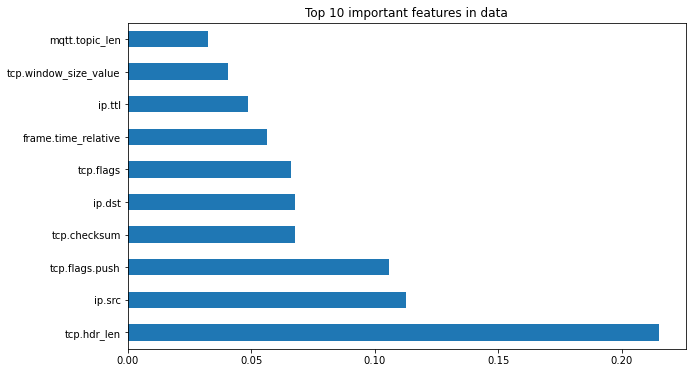

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) ## use inbuilt class feature_importances of tree based classifiers
## plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 important features in data")
plt.show()

In [23]:
corelation =['tcp.srcport', 'tcp.hdr_len', 'tcp.flags', 'tcp.flags.push', 'tcp.checksum', 'mqtt.topic_len', 'ip.ttl', 'ip.dst','ip.src','label']

In [24]:
df=df[corelation]
df

,tcp.srcport,tcp.hdr_len,tcp.flags,tcp.flags.push,tcp.checksum,mqtt.topic_len,ip.ttl,ip.dst,ip.src,label
0,56808,40,0,0,27801,0.0,64,1,0,1
1,1883,40,4,0,27588,0.0,64,0,1,1
2,56810,40,0,0,33722,0.0,64,1,0,1
3,1883,40,4,0,2626,0.0,64,0,1,1
4,56812,40,0,0,44444,0.0,64,1,0,1
...,...,...,...,...,...,...,...,...,...,...
188689,44993,32,6,1,3098,3.0,64,32,28,0
188690,38323,32,6,1,3080,3.0,64,32,15,0
188691,41889,32,6,1,3080,3.0,64,32,15,0
188692,35965,32,6,1,3099,3.0,64,32,30,0


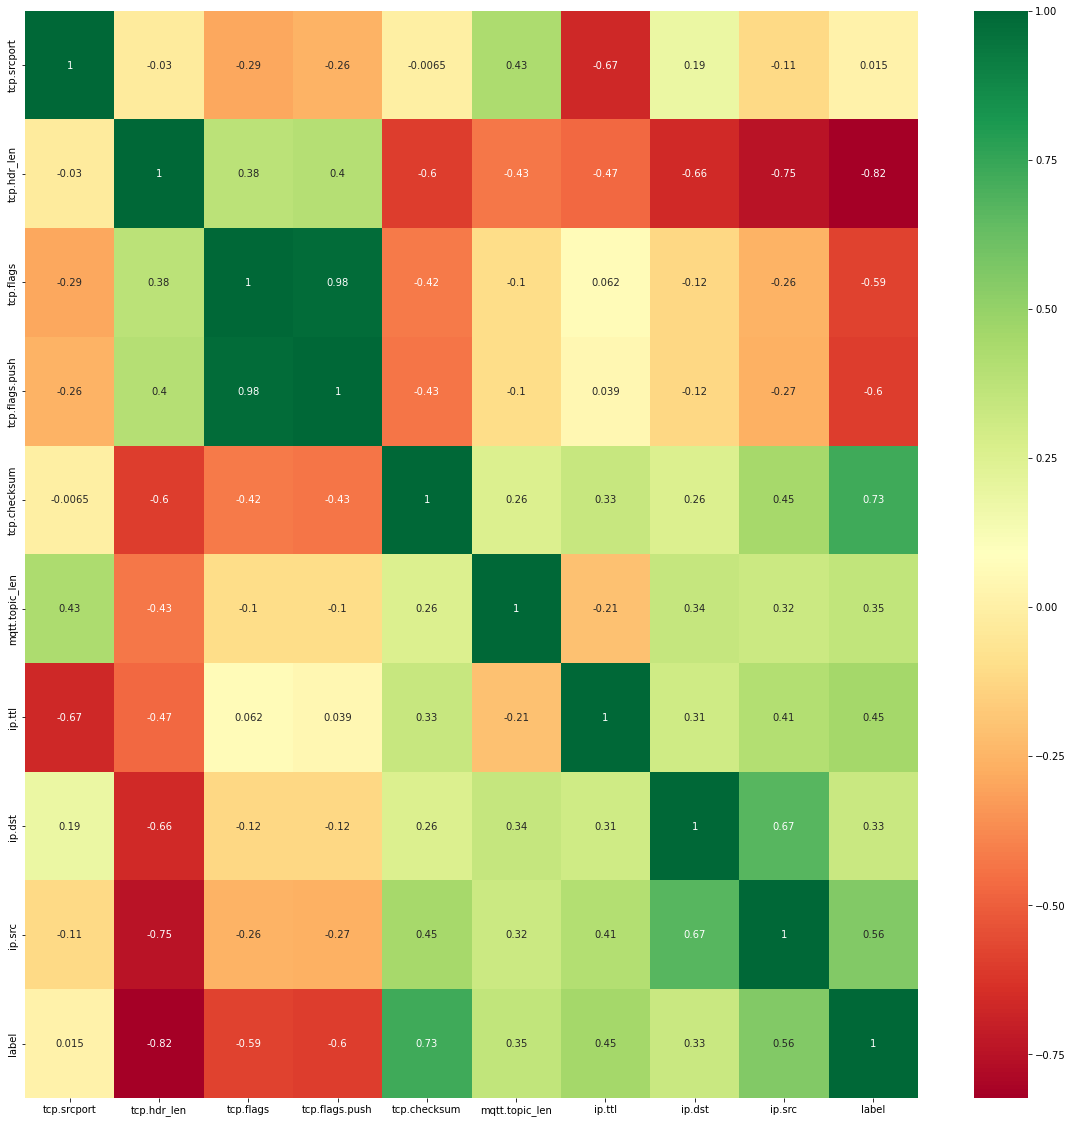

In [25]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

---

# <center> 4. Machine Learning Modelling

---

In [26]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split( df.drop(labels=['label'], axis=1), df['label'], 
                                                                            test_size=0.3, random_state=100)

In [27]:
X_train

,tcp.srcport,tcp.hdr_len,tcp.flags,tcp.flags.push,tcp.checksum,mqtt.topic_len,ip.ttl,ip.dst,ip.src
143898,35965,32,6,1,3099,3.0,64,32,30
158794,1883,32,6,1,3090,0.0,64,28,32
116111,46653,32,6,1,3080,3.0,64,32,15
58078,54572,20,2,0,2872,66.0,64,43,42
10589,54547,20,2,0,42576,0.0,64,43,42
...,...,...,...,...,...,...,...,...,...
82270,1883,32,6,1,3111,0.0,64,22,33
65615,1883,20,6,1,44821,0.0,128,42,43
77655,1883,20,3,0,8985,0.0,128,42,43
56088,54566,20,2,0,44860,0.0,64,43,42


In [28]:
normalizer = MinMaxScaler()
X_train=normalizer.fit_transform(X_train)

In [29]:
X_test

,tcp.srcport,tcp.hdr_len,tcp.flags,tcp.flags.push,tcp.checksum,mqtt.topic_len,ip.ttl,ip.dst,ip.src
109898,37013,32,6,1,11886,8.0,64,34,37
135455,39859,32,6,1,3098,3.0,64,32,28
146863,39859,32,6,1,3098,3.0,64,32,28
12834,54565,20,6,1,23394,65.0,64,43,42
98063,40605,32,6,1,3115,5.0,64,33,18
...,...,...,...,...,...,...,...,...,...
24871,54558,20,6,1,7663,65.0,64,43,42
62432,1883,20,2,0,42032,0.0,128,42,43
16356,1883,20,6,1,9954,0.0,128,42,43
29317,54547,20,2,0,13661,65.0,64,43,42


In [30]:
X_test=normalizer.transform(X_test)

In [31]:
# Machine Learning Algorithms

knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [32]:
clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [33]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1_score = f1_score(y_test,y_pred)
    recall_score = recall_score(y_test,y_pred)
    
    return accuracy,precision,recall_score,f1_score

In [34]:
accuracy_scores = []
precision_scores = []
recall_score = []
f1_score = []


for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall_score,current_f1_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("recall_score - ",current_recall_score)
    print("f1_score - ",current_f1_score)
    print("-------------------------------------")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_score.append(current_recall_score)
    f1_score.append(current_f1_score)


For  KN
Accuracy -  1.0
Precision -  1.0
recall_score -  1.0
f1_score -  1.0
-------------------------------------
For  NB
Accuracy -  0.9461393064707025
Precision -  1.0
recall_score -  0.8729000792029681
f1_score -  0.9321373722985155
-------------------------------------
For  DT
Accuracy -  1.0
Precision -  1.0
recall_score -  1.0
f1_score -  1.0
-------------------------------------
For  LR
Accuracy -  1.0
Precision -  1.0
recall_score -  1.0
f1_score -  1.0
-------------------------------------
For  RF
Accuracy -  1.0
Precision -  1.0
recall_score -  1.0
f1_score -  1.0
-------------------------------------
For  AdaBoost
Accuracy -  1.0
Precision -  1.0
recall_score -  1.0
f1_score -  1.0
-------------------------------------
For  BgC
Accuracy -  1.0
Precision -  1.0
recall_score -  1.0
f1_score -  1.0
-------------------------------------
For  ETC
Accuracy -  1.0
Precision -  1.0
recall_score -  1.0
f1_score -  1.0
-------------------------------------
For  GBDT
Accuracy -  1.0
P

In [35]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_score,'F1-score':f1_score}).sort_values('Precision')
performance_df

,Algorithm,Accuracy,Precision,Recall,F1-score
0,KN,1.000000,1.0,1.0000,1.000000
1,NB,0.946139,1.0,0.8729,0.932137
2,DT,1.000000,1.0,1.0000,1.000000
3,LR,1.000000,1.0,1.0000,1.000000
4,RF,1.000000,1.0,1.0000,1.000000
5,AdaBoost,1.000000,1.0,1.0000,1.000000
6,BgC,1.000000,1.0,1.0000,1.000000
7,ETC,1.000000,1.0,1.0000,1.000000
8,GBDT,1.000000,1.0,1.0000,1.000000


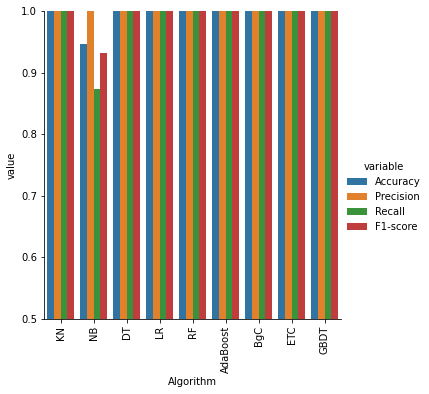

In [36]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [37]:
import pickle
pickle.dump(normalizer,open('normalizer.pkl','wb'))
pickle.dump(rfc,open('rfc_model.pkl','wb'))

# <center> 5. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was quiet big with just 188694 samples & 52 feature present
- After preprocessing 10 features we selected using extratreeclassifier which is highly corelated with target.
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with ExtraTreeClassifier Technique.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- While, Random Forest Classifier is not prone to the overfitting, Hence it is safe to use as final algorithm as their scores were quiet comparable & also they're more generalisable.

In [38]:
#<<<--------------------------------------------THE END------------------------------------------------>>>